Generate one tone on the output DAC and read it on the ADC.

Change the number of samples per read (streamLength) and repeat for a tone at a different frequency.

In [1]:
import importlib
import Mkids
import numpy as np
import matplotlib.pyplot as plt
from MkidsSoc import *
mkidsSoc = MkidsSoc(force_init_clks=False)

In [2]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)


In [3]:
# Place the mixer so the output frequencies are centered on range of input frequencies
fMixer = mkids.fsIn/2
mkids.setFMixer(fMixer)


In [4]:
# Choose a tone frequency
fTone = fMixer + mkids.fsOut/np.pi + 0.523
inCh,inOffset = mkids.inFreq2chOffset(fTone)
outCh,outOffset = mkids.outFreq2chOffset(fTone)
print("fTone = %.6f MHz"%fTone)
print("  inCh=%4d    inOffset=%+.6f"%(inCh, inOffset))
print(" outCh=%4d   outOffset=%+.6f"%(outCh, outOffset))

fTone = 1350.472323 MHz
  inCh= 653    inOffset=-0.027677
 outCh= 163   outOffset=+0.472323


In [5]:
# This generates a single tone
# Look at the DAC output on scope or spectrum analyzer if you wish.
# It also sets the input channel to demodulate this tone back to DC, and it
# prepares readout.
amplitudes = np.array([0.9])
frequencies = np.array([fTone])
fis = np.array([1.234])
mkids.setMultiTones(frequencies, amplitudes, fis, fMixer, verbose=True)

setMultiTones:  multiFreqs = [1350.47229004]
setMultiTones:  fMixer = 1024.0  fMixerQuantized = 1024.0
setMultiTones:  outCh= 163 f=+0.472290 amplitude=0.900000 
setMultiTones:   inCh= 653 f=-0.027710
setupReadAllMultitones: for inCh=653 set bit=17 in addr=2
setupReadAllMultitones: addr= 0  data=00000000
setupReadAllMultitones: addr= 1  data=00000000
setupReadAllMultitones: addr= 2  data=00020000
setupReadAllMultitones: addr= 3  data=00000000
setupReadAllMultitones: addr= 4  data=00000000
setupReadAllMultitones: addr= 5  data=00000000
setupReadAllMultitones: addr= 6  data=00000000
setupReadAllMultitones: addr= 7  data=00000000
setupReadAllMultitones: addr= 8  data=00000000
setupReadAllMultitones: addr= 9  data=00000000
setupReadAllMultitones: addr=10  data=00000000
setupReadAllMultitones: addr=11  data=00000000
setupReadAllMultitones: addr=12  data=00000000
setupReadAllMultitones: addr=13  data=00000000
setupReadAllMultitones: addr=14  data=00000000
setupReadAllMultitones: addr=15  dat

In [6]:
nt = 1
xs = mkids.readAllMultiTones(nt=nt)


Text(0.5, 1.0, 'fToneRequested=1350.472323  fToneQuantized=1350.472290')

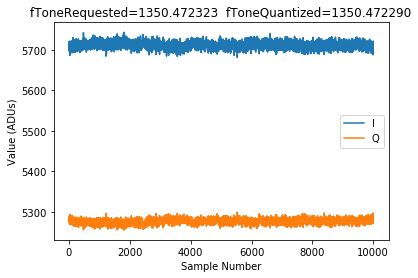

In [7]:
iValues = np.real(xs[inCh])
qValues = np.imag(xs[inCh])
plt.plot(iValues, label="I")
plt.plot(qValues, label="Q")
plt.xlabel("Sample Number")
plt.ylabel("Value (ADUs)")
plt.legend()
plt.title("fToneRequested=%.6f  fToneQuantized=%.6f"%(fTone, mkids.multiFreqs[0]))

In [8]:
# Choose a tone frequency
fTone = fMixer + mkids.fsOut/np.pi - 10.234
inCh,inOffset = mkids.inFreq2chOffset(fTone)
outCh,outOffset = mkids.outFreq2chOffset(fTone)
print("fTone = %.6f MHz"%fTone)
print("  inCh=%4d    inOffset=%+.6f"%(inCh, inOffset))
print(" outCh=%4d   outOffset=%+.6f"%(outCh, outOffset))

fTone = 1339.715323 MHz
  inCh= 631    inOffset=+0.215323
 outCh= 158   outOffset=-0.284677


inCh = 631


Text(0.5, 1.0, 'fToneRequested=1339.715323  fToneQuantized=1339.715271')

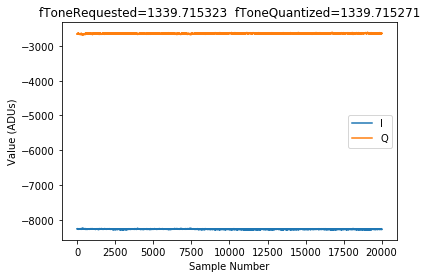

In [9]:
amplitudes = np.array([0.9])
frequencies = np.array([fTone])
fis = np.array([1.234])
mkids.setMultiTones(frequencies, amplitudes, fis, fMixer, verbose=False)
mkids.setStreamLength(20000)
xs = mkids.readAllMultiTones(nt=nt)
inCh = list(xs.keys())[0]
print("inCh =",inCh)
iValues = np.real(xs[inCh])
qValues = np.imag(xs[inCh])
plt.plot(iValues, label="I")
plt.plot(qValues, label="Q")
plt.xlabel("Sample Number")
plt.ylabel("Value (ADUs)")
plt.legend()
plt.title("fToneRequested=%.6f  fToneQuantized=%.6f"%(fTone, mkids.multiFreqs[0]))